<h6>#Task2</h6><h4>Explore Supervised Machine Learning</h4>

Predict the percentage of marks of an student based on the number of
study hours

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline




In [2]:
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df= pd.read_csv(link )
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [31]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [4]:
df.shape

(25, 2)

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:


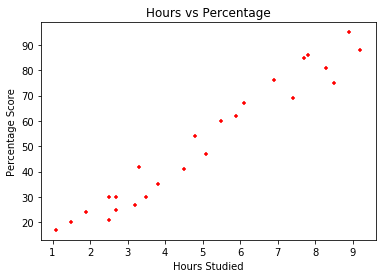

In [5]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores',kind='scatter',marker='+' ,color='red') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

PREPARING THE DATA

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
x = df.iloc[:, :-1].values  

print(x)


[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [7]:
y= df.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [14]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training completed.")

Training completed.


In [15]:
print(reg.coef_)

[9.91065648]


In [16]:
print(reg.intercept_)

2.018160041434683


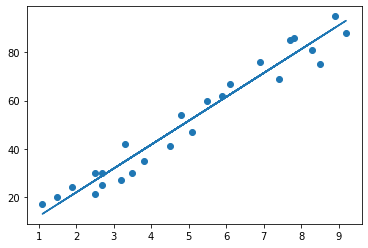

In [20]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

MAKING PREDICTION


Now that we have trained our algorithm, it's time to make some predictions.

In [21]:
print(X_test) # Testing data - In Hours
pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
df1= pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
y_pred=reg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred)) 

Mean Absolute Error: 4.183859899002975


In [30]:
#predicting score for the student studying for 9.5 hr
hr=9.5
pred_score=reg.predict([[9.5]])
print("no.of hours",[hr])
print("score",pred_score)

no.of hours [9.5]
score [96.16939661]
